# INFO 5613 – Class 05: Network visualization

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)

## Import libraries

In [1]:
# Load networkx for working with network data
import networkx as nx

# Load numpy for working with numerical data
import numpy as np

# Load pandas for working with tabular data
import pandas as pd

# Load visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Import a library for doing random operations
import random
random.seed = 42

# Define a formatting string we can use to print the number of nodes and edges
node_edge_s = "There are {0:,} nodes and {1:,} edges in the network"

## Load and examine the graph file

In [2]:
# Load the file from disk and assign to the g variable
g = nx.read_gml('polblogs_cleaned.gml')

In [3]:
# Print out the number of nodes and edges using the string from above
print(node_edge_s.format(g.number_of_nodes(),g.number_of_edges()))

There are 1,490 nodes and 19,025 edges in the network


In [4]:
# Inspect the first 10 nodes' meta-data
list(g.nodes(data=True))[:10]

[('liberaloasis.com',
  {'value': 0, 'source': 'LeftyDirectory,LabeledManually,CampaignLine'}),
 ('hugozoom.blogspot.com', {'value': 0, 'source': 'Blogarama,LeftyDirectory'}),
 ('wholewheatblogger.com', {'value': 1, 'source': 'BlogCatalog'}),
 ('drudgereport.com', {'value': 1, 'source': 'LabeledManually'}),
 ('markarkleiman.com', {'value': 0, 'source': 'eTalkingHead'}),
 ('ospolitics.org', {'value': 0, 'source': 'LabeledManually'}),
 ('oddhours.blogspot.com', {'value': 0, 'source': 'Blogarama,eTalkingHead'}),
 ('j-bradford-delong.net/movable_type',
  {'value': 0, 'source': 'LeftyDirectory,eTalkingHead'}),
 ('dashnier.blogspot.com', {'value': 0, 'source': 'BlogCatalog'}),
 ('michaelphillips.blogspot.com', {'value': 0, 'source': 'BlogCatalog'})]

In [5]:
# Inspect the first 10 edges' meta-data
list(g.edges(data=True))[:10]

[('liberaloasis.com', 'hugozoom.blogspot.com', {'edge_type': '0-0'}),
 ('liberaloasis.com', 'reachm.com/amstreet', {'edge_type': '0-0'}),
 ('liberaloasis.com', 'americablog.blogspot.com', {'edge_type': '0-0'}),
 ('liberaloasis.com', 'offthekuff.com/mt', {'edge_type': '0-0'}),
 ('liberaloasis.com', 'yglesias.typepad.com/matthew', {'edge_type': '0-0'}),
 ('liberaloasis.com', 'digbysblog.blogspot.com', {'edge_type': '0-0'}),
 ('liberaloasis.com', 'democraticunderground.com', {'edge_type': '0-0'}),
 ('liberaloasis.com', 'mathewgross.com/blog', {'edge_type': '0-0'}),
 ('liberaloasis.com', 'riverbendblog.blogspot.com', {'edge_type': '0-0'}),
 ('liberaloasis.com', 'interestingtimes.blogspot.com', {'edge_type': '0-0'})]

### Sample the network

Visualizing the whole network with more than 19k edges is especially slow in `matplotlib`. Let's take a sample of the network to speed things up.

In [6]:
# Extract a 5% sample (1903 edges) of edges and save to sampled_edges
k = round(19025 * .01)
sampled_edges = random.sample(list(g.edges(data=True)),k)

# Make a new graph from the sampled edges
sampled_g = nx.DiGraph()
sampled_g.add_edges_from(sampled_edges)
sampled_g = g.subgraph(sampled_g)

print(node_edge_s.format(sampled_g.number_of_nodes(),sampled_g.number_of_edges()))

There are 259 nodes and 5,219 edges in the network


Make sure the node and edge metadata is still present.

In [7]:
list(sampled_g.nodes(data=True))[:10]

[('risinghegemon.blogspot.com', {'value': 0, 'source': 'Blogarama'}),
 ('outsidethebeltway.com',
  {'value': 1, 'source': 'BlogPulse,eTalkingHead,CampaignLine'}),
 ('simbaud.blogspot.com', {'value': 0, 'source': 'Blogarama'}),
 ('prospect.org/weblog', {'value': 0, 'source': 'BlogPulse,LeftyDirectory'}),
 ('brutallyhonest.org', {'value': 1, 'source': 'Blogarama'}),
 ('scha-den-freu-de.blogspot.com', {'value': 1, 'source': 'Blogarama'}),
 ('lucianne.com', {'value': 1, 'source': 'LabeledManually'}),
 ('ajbenjaminjr.blogspot.com', {'value': 0, 'source': 'LabeledManually'}),
 ('lt-smash.us', {'value': 1, 'source': 'LabeledManually'}),
 ('amptoons.com/blog', {'value': 0, 'source': 'LeftyDirectory'})]

In [8]:
list(sampled_g.edges(data=True))[:10]

[('risinghegemon.blogspot.com', 'atrios.blogspot.com', {'edge_type': '0-0'}),
 ('risinghegemon.blogspot.com', 'dailykos.com', {'edge_type': '0-0'}),
 ('risinghegemon.blogspot.com', 'washingtonmonthly.com', {'edge_type': '0-0'}),
 ('risinghegemon.blogspot.com', 'andrewsullivan.com', {'edge_type': '0-1'}),
 ('risinghegemon.blogspot.com', 'thepoorman.net', {'edge_type': '0-0'}),
 ('risinghegemon.blogspot.com',
  'stevegilliard.blogspot.com',
  {'edge_type': '0-0'}),
 ('risinghegemon.blogspot.com', 'pandagon.net', {'edge_type': '0-0'}),
 ('outsidethebeltway.com', 'powerlineblog.com', {'edge_type': '1-1'}),
 ('outsidethebeltway.com', 'windsofchange.net', {'edge_type': '1-1'}),
 ('outsidethebeltway.com', 'lt-smash.us', {'edge_type': '1-1'})]

## Explore different layout algorithms

networkx has about a dozen different graph layout algorithms included. Check out the [docs](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout).

Visualizing networks using **matplotlib** is painful and slow. You will almost certainly want to use other tools like Gephi or Cytoscape for anything but the smallest and simplest networks.

In [9]:
[i for i in dir(nx.layout) if '_' not in i[:5]]

['bipartite_layout',
 'circular_layout',
 'fruchterman_reingold_layout',
 'kamada_kawai_layout',
 'multipartite_layout',
 'nx',
 'planar_layout',
 'random_layout',
 'random_state',
 'rescale_layout',
 'rescale_layout_dict',
 'shell_layout',
 'spectral_layout',
 'spiral_layout',
 'spring_layout']

### Define colors for nodes and edges

Define the colors for each node based on their partisan "value".

In [10]:
node_colormap = {
    0:'#0000ff',
    1:'#ff0803'}

node_colors = [node_colormap.get(d['value']) for n,d in sampled_g.nodes(data=True)]

Define the colors for each edge based on their edge_type.

In [11]:
edge_colormap = {
    "0-0": mcolors.TABLEAU_COLORS.get('tab:green'),
    "1-1": mcolors.TABLEAU_COLORS.get('tab:orange'),
    "1-0": mcolors.TABLEAU_COLORS.get('tab:purple'),
    "0-1": mcolors.TABLEAU_COLORS.get('tab:brown'),
}

edge_colors = [edge_colormap.get(d['edge_type']) for i,j,d in sampled_g.edges(data=True)]

Make a legend.

In [12]:
# Adapted from: https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colormap[0], markersize=15, label = 'Left'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colormap[1], markersize=15, label = 'Right'),
    Line2D([0], [0], color = 'tab:green', label = 'Left-to-left', linewidth=5),
    Line2D([0], [0], color = 'tab:orange', label = 'Right-to-right', linewidth=5),
    Line2D([0], [0], color = 'tab:purple', label = 'Right-to-left', linewidth=5),
    Line2D([0], [0], color = 'tab:brown', label = 'Left-to-right', linewidth=5)
]

### Spring-embedding algorithms

`fruchterman_reingold_layout` (`spring_layout` is an alias for the same) and `kamada_kawai_layout` are two spring-embedding layouts included in **networkx**.

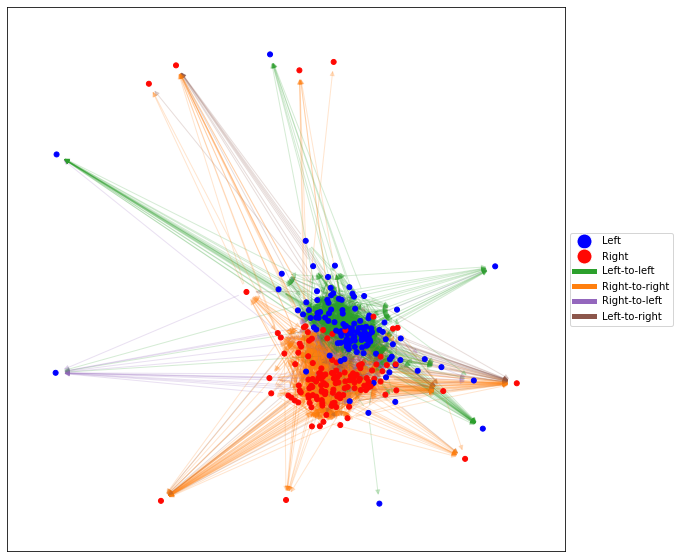

In [13]:
pos_fr = nx.drawing.fruchterman_reingold_layout(
    G = sampled_g,
    k = .1,           # distance between nodes
    iterations = 50,  # number of rounds to run
    scale = 1,        # try larger
    seed = 42         # make it reproducible for others
)

f,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(
    sampled_g,
    pos = pos_fr,
    node_color = node_colors,
    node_size = 25,
    ax = ax
)

nx.draw_networkx_edges(
    sampled_g,
    pos = pos_fr,
    edge_color = edge_colors,
    alpha = .2,
    ax = ax
)

ax.legend(handles=legend_elements,loc='center left',bbox_to_anchor=(1,.5))

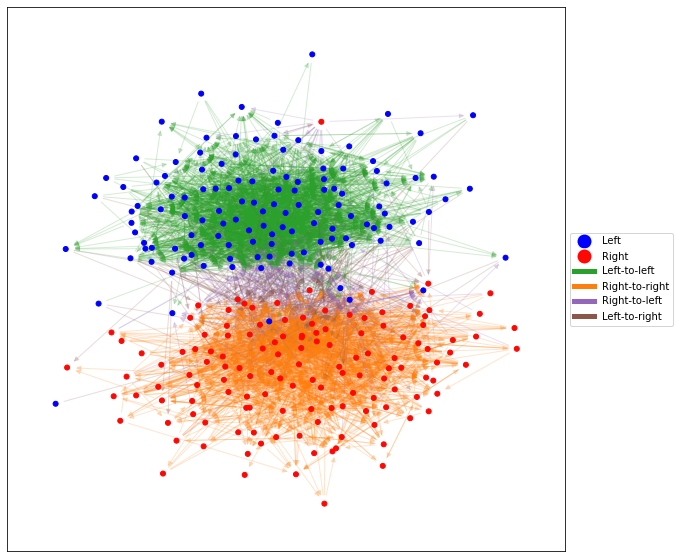

In [14]:
pos_kk = nx.drawing.kamada_kawai_layout(
    G = sampled_g,
    scale = 1
)

f,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(
    sampled_g,
    pos = pos_kk,
    node_color = node_colors,
    node_size = 25,
    ax = ax
)

nx.draw_networkx_edges(
    sampled_g,
    pos = pos_kk,
    edge_color = edge_colors,
    alpha = .2,
    ax = ax
)

ax.legend(handles=legend_elements,loc='center left',bbox_to_anchor=(1,.5))

### Circular algorithms

`circular_layout` and `spiral_layout`

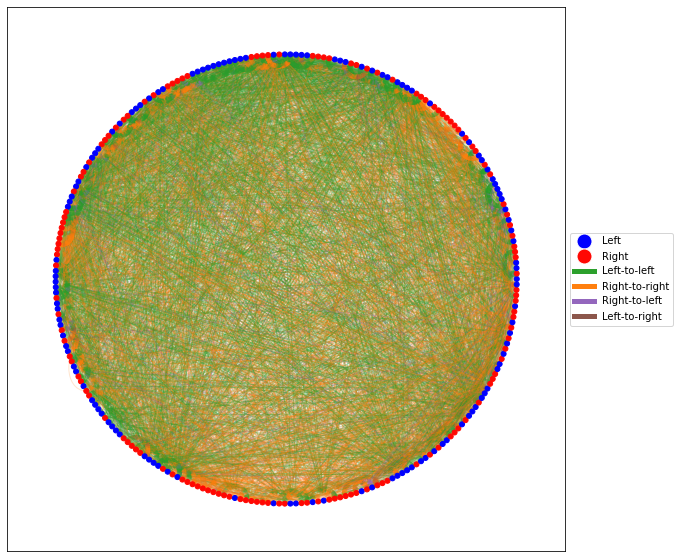

In [15]:
pos_circular = nx.drawing.circular_layout(sampled_g)

f,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(
    sampled_g,
    pos = pos_circular,
    node_color = node_colors,
    node_size = 25,
    ax = ax
)

nx.draw_networkx_edges(
    sampled_g,
    pos = pos_circular,
    edge_color = edge_colors,
    alpha = .2,
    ax = ax
)

ax.legend(handles=legend_elements,loc='center left',bbox_to_anchor=(1,.5))

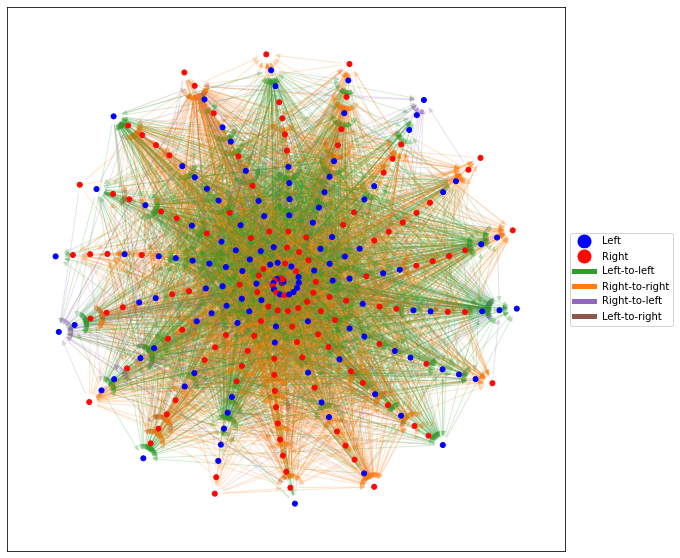

In [16]:
pos_spiral = nx.drawing.spiral_layout(sampled_g)

f,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(
    sampled_g,
    pos = pos_spiral,
    node_color = node_colors,
    node_size = 25,
    ax = ax
)

nx.draw_networkx_edges(
    sampled_g,
    pos = pos_spiral,
    edge_color = edge_colors,
    alpha = .2,
    ax = ax
)

ax.legend(handles=legend_elements,loc='center left',bbox_to_anchor=(1,.5))

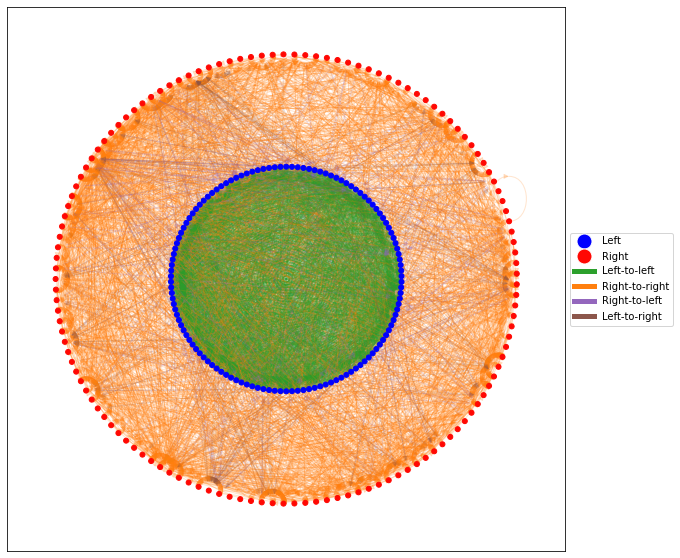

In [17]:
# Make a list of 0 and 1 nodes
nodes_0 = [n for n,d in sampled_g.nodes(data=True) if d['value'] == 0]
nodes_1 = [n for n,d in sampled_g.nodes(data=True) if d['value'] == 1]

# Make a list of lists of these two different node types
nlist = [nodes_0,nodes_1]

pos_shell = nx.drawing.shell_layout(
    G = sampled_g,
    nlist = nlist # Pass the nlist here
)

f,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(
    sampled_g,
    pos = pos_shell,
    node_color = node_colors,
    node_size = 25,
    ax = ax
)

nx.draw_networkx_edges(
    sampled_g,
    pos = pos_shell,
    edge_color = edge_colors,
    alpha = .2,
    ax = ax
)

ax.legend(handles=legend_elements,loc='center left',bbox_to_anchor=(1,.5))

### Multipartite algorithms

We'll revisit these around week 14 `bipartite_layout` and `multipartite_layout`.

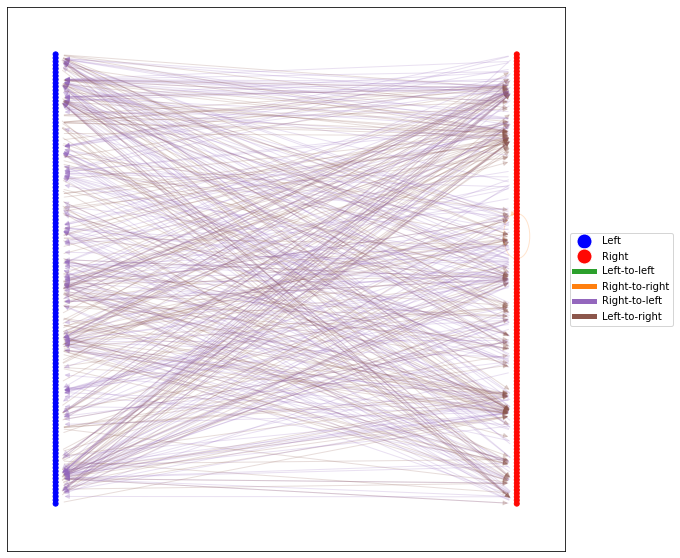

In [18]:
pos_bipartite = nx.drawing.bipartite_layout(
    G = sampled_g,
    nodes = nodes_0
)

f,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(
    sampled_g,
    pos = pos_bipartite,
    node_color = node_colors,
    node_size = 25,
    ax = ax
)

nx.draw_networkx_edges(
    sampled_g,
    pos = pos_bipartite,
    edge_color = edge_colors,
    alpha = .2,
    ax = ax
)

ax.legend(handles=legend_elements,loc='center left',bbox_to_anchor=(1,.5))

### Miscellaneous

You will almost certainly never use these layout algorithms for data found in the wild.

* `planar_layout` - A [special graph class](https://en.wikipedia.org/wiki/Planar_graph) where edges never touch each other. 
* `random_layout` - A network laid out at random.
* `spectral_layout` - A network laid out following math a bit beyond the scope of this class

In [19]:
# This will throw a NetworkXException because sampled_g -- like most real-world networks -- is not planar
pos_planar = nx.drawing.planar_layout(sampled_g)

f,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(
    sampled_g,
    pos = pos_planar,
    node_color = node_colors,
    node_size = 25,
    ax = ax
)

nx.draw_networkx_edges(
    sampled_g,
    pos = pos_planar,
    edge_color = edge_colors,
    ax = ax
)

ax.legend(handles=legend_elements,loc='center left',bbox_to_anchor=(1,.5))

NetworkXException: G is not planar.

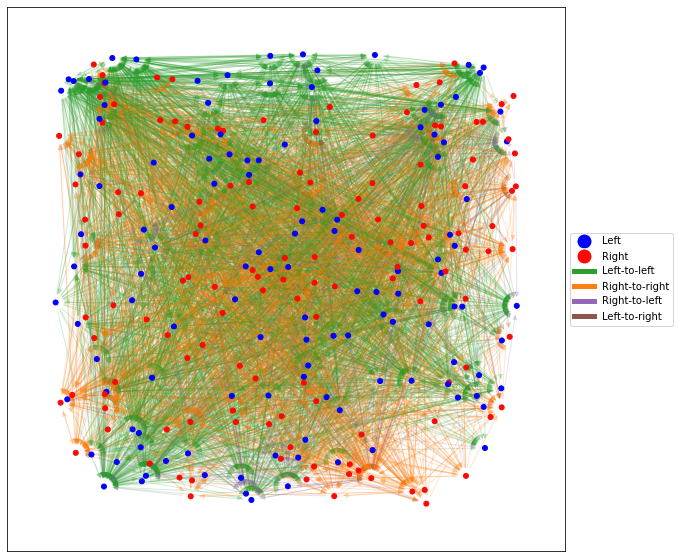

In [20]:
pos_random = nx.drawing.random_layout(sampled_g)

f,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(
    sampled_g,
    pos = pos_random,
    node_color = node_colors,
    node_size = 25,
    ax = ax
)

nx.draw_networkx_edges(
    sampled_g,
    pos = pos_random,
    edge_color = edge_colors,
    alpha = .2,
    ax = ax
)

ax.legend(handles=legend_elements,loc='center left',bbox_to_anchor=(1,.5))

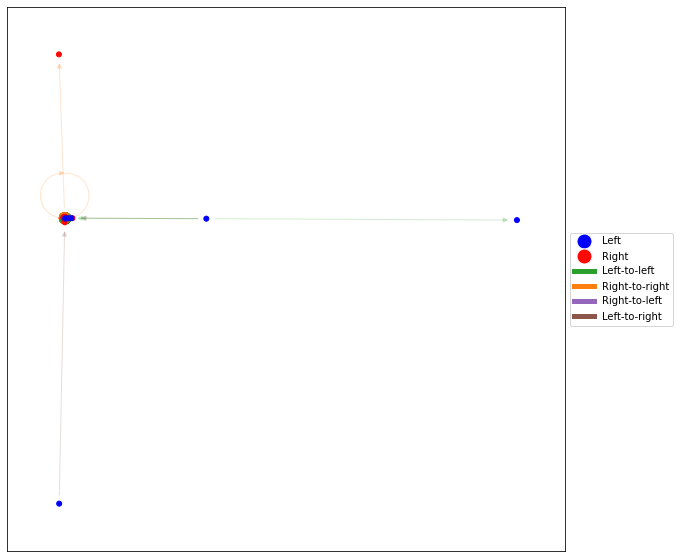

In [21]:
pos_spectral = nx.drawing.spectral_layout(
    G = sampled_g,
    scale = 50
)

f,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(
    sampled_g,
    pos = pos_spectral,
    node_color = node_colors,
    node_size = 25,
    ax = ax
)

nx.draw_networkx_edges(
    sampled_g,
    pos = pos_spectral,
    edge_color = edge_colors,
    alpha = .2,
    ax = ax
)

ax.legend(handles=legend_elements,loc='center left',bbox_to_anchor=(1,.5))

## Super-customized

Let's make a spring-embedding network using Kamada-Kawai, but vary some other properties of the visualization like the node size and edge width.

In [22]:
# Edge betweenness is a measure of how important an edge is for connecting the network
edge_bw = nx.edge_betweenness(sampled_g)
edge_bw_scaled = [v*1e3 for k,v in edge_bw.items()]

In [23]:
# PageRank is a recursive measure of node importance: a node is important if it's connected to other important nodes
pagerank = nx.pagerank(sampled_g)
pagerank_scaled = [v*1e4 for k,v in pagerank.items()]

In [35]:
pos_kk = nx.drawing.kamada_kawai_layout(
    G = sampled_g,
    scale = 2
)

# This should increase the spacing between everything by a factor of 10
pos_kk10 = nx.drawing.rescale_layout_dict(pos_kk, scale = 10)

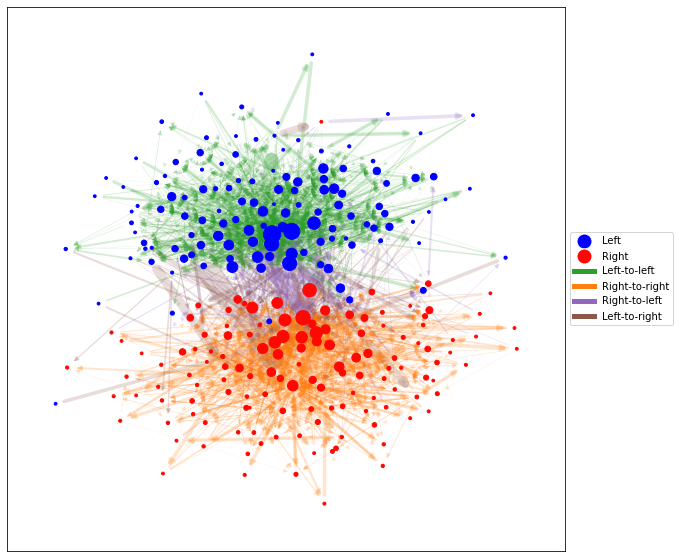

In [36]:
f,ax = plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(
    sampled_g,
    pos = pos_kk10, # pass the re-scaled positions
    node_color = node_colors,
    node_size = pagerank_scaled,
    ax = ax
)

nx.draw_networkx_edges(
    sampled_g,
    pos = pos_kk10, # pass the re-scaled positions
    width = edge_bw_scaled,
    edge_color = edge_colors,
    alpha = .2,
    ax = ax
)

ax.legend(handles=legend_elements,loc='center left',bbox_to_anchor=(1,.5))

## Appendix

Cleaning the original polblogs data.

1. There are handful duplicate edges in the data that I'm going to exclude.
2. Generate edge attributes for links between partisan blogs.
3. Write cleaned file.

Load the original gml file from a source like [this](https://figshare.com/articles/dataset/A_directed_network_of_hyperlinks_between_weblogs_on_US_politics_recorded_in_2005_by_Adamic_and_Glance_/1149954/1). Note that networkx's `read_gml` can't handle the duplicate edges by default; [we need to add a line](https://groups.google.com/g/networkx-discuss/c/kF2sbuLjGwY?pli=1) "multigraph 1" to the file manually and then we can read it in.

In [ ]:
# Load the file from disk and assign to the g variable
g = nx.read_gml('polblogs.gml')

# Print out the number of nodes and edges using the string from above
print(node_edge_s.format(g.number_of_nodes(),g.number_of_edges()))

In [ ]:
# Make an empty graph
g_dg = nx.DiGraph()

# Add all the *unique* edges
g_dg.add_edges_from(set(g.edges()))

# Add all the nodes and their metadata
g_dg.add_nodes_from(g.nodes(data=True))

# Print out the number of nodes and edges using the string from above
print(node_edge_s.format(g_dg.number_of_nodes(),g_dg.number_of_edges()))

In [ ]:
# Make a dictionary of the node data so we can look it up
g_dg_node_dict = dict(g_dg.nodes(data=True))

In [ ]:
# Loop through all the edges in the network
for i,j,d in g_dg.edges(data=True):
    
    # Get the node value for the source-side of the edge
    _i_val = g_dg_node_dict[i]['value']
    
    # Get the node value for the target-side of the edge
    _j_val = g_dg_node_dict[j]['value']
    
    # Assign a new edge attribute as a string with the source-target values
    d['edge_type'] = "{0}-{1}".format(_i_val,_j_val)

In [ ]:
# Write the cleaned data to disk
nx.write_gml(g_dg,'polblogs_cleaned.gml')